# 데이터 불러오기, 데이터 확인

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
data = pd.read_csv('../data/trip.csv')

In [286]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [288]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 중복 데이터 확인

In [289]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [290]:
data[data['passenger_name'] == 'Sarah Gross']
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [291]:
data = data.drop_duplicates()

In [292]:
data.duplicated().sum()

0

# 결측치 확인

In [293]:
data['fare_amount'].isna().sum()

3

In [294]:
data['fare_amount'].isna().mean()

0.0001321644125291863

### 총 데이터 수가 20000개가 넘고, null값이 3개뿐이므로 행 제거

In [295]:
data = data.dropna()

In [296]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# passenger_count 컬럼의 이상치 제거

In [297]:
data['passenger_count'].sort_values(ascending=False)

64       36
0         6
7189      6
21865     6
7375      6
         ..
21640     0
21754     0
14521     0
12804     0
12205     0
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

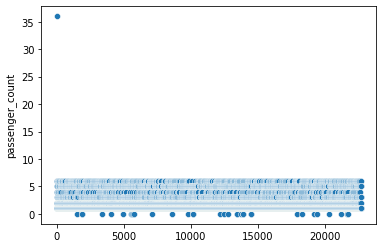

In [298]:
sns.scatterplot(x=data.index, y=data['passenger_count'])

### passenger_count 값이 6 이후로 확 뛰는 경향이 있으며, 데이터가 1개 밖에 없으므로 제거

In [299]:
data = data.loc[data['passenger_count']<=6]

In [300]:
data['passenger_count'].sort_values()

20312    0
17916    0
1876     0
10201    0
4921     0
        ..
14747    6
14745    6
10556    6
21945    6
0        6
Name: passenger_count, Length: 22695, dtype: int64

### fare_amount, trip_amount, tip_amount 등이 존재하는데 passenger_count가 0일수는 없으므로 제거

In [301]:
data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [302]:
data[data['passenger_count'] == 0].shape[0]

33

In [303]:
data = data.loc[data['passenger_count']!=0]

In [304]:
data['passenger_count'].sort_values()

11351    1
13892    1
13891    1
13889    1
13887    1
        ..
3016     6
18483    6
18479    6
3316     6
0        6
Name: passenger_count, Length: 22662, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

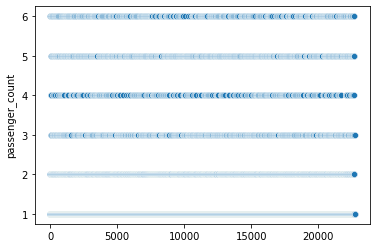

In [305]:
sns.scatterplot(x=data.index, y=data['passenger_count'])

# 수치형 컬럼의 이상치 제거

In [306]:
data['trip_distance'].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

<AxesSubplot:ylabel='trip_distance'>

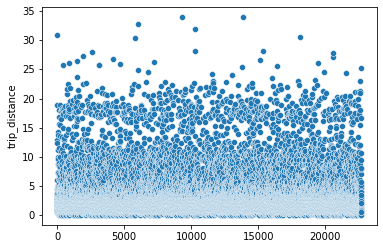

In [307]:
sns.scatterplot(x=data.index, y=data['trip_distance'])

### 손님 수가 1 이상인데 distance가 0일수는 없으므로 제거

In [308]:
data.loc[data['trip_distance']==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [309]:
data = data.loc[data['trip_distance']>0]

In [310]:
data['trip_distance'].sort_values()

2987      0.01
19646     0.01
8199      0.01
5503      0.01
3611      0.01
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22515, dtype: float64

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

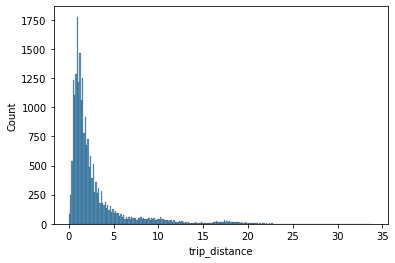

In [311]:
sns.histplot(data['trip_distance'])

In [312]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [313]:
data.loc[data['fare_amount']<=0].shape[0]

16

### 요금에 음수는 말이 안되며, 999.99는 튀는 단일값으로 이상치로 판단 후 제거

In [314]:
data['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
16381    140.00
9282     150.00
3584     152.00
13863    200.01
8478     999.99
Name: fare_amount, Length: 22515, dtype: float64

In [315]:
data = data.loc[data['fare_amount']>0]

In [316]:
data['fare_amount'].max()

999.99

In [317]:
data = data.loc[data['fare_amount']<800]

### 200은 152의 요금값과 큰 차이가 없으며 충분히 나올 수 있는 요금이라고 판단되어 유지하되, 값의 범위가 커질 수 있으므로 150 이상은 150으로 통일된 값 사용

In [318]:
data['fare_amount'].max()

200.01

<AxesSubplot:ylabel='fare_amount'>

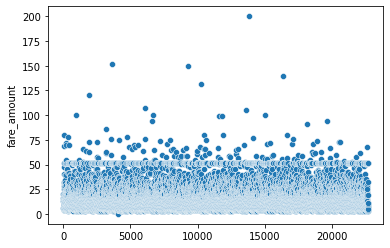

In [319]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

In [320]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [321]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.00,0.00
19371,Amanda Taylor,03/24/2017 8:59:58 PM,03/24/2017 9:00:06 PM,Cash,1,0.02,2.50,7.00,0.00
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.00,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.00,51.64,5.76
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00


<AxesSubplot:ylabel='tip_amount'>

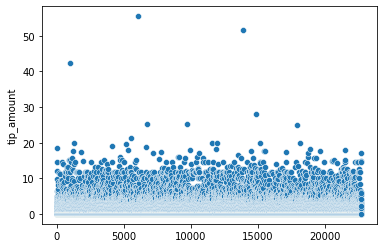

In [322]:
sns.scatterplot(x=data.index, y=data['tip_amount'])

### IQR을 적용하면 약 7이상부터는 모두 이상치이나, 비슷한 값들이 존재하므로 1~2개 선에서 튀는 40을 기준으로 이상치를 결정

In [323]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22498.000000,22498.000000,22498.000000,22498.000000,22498.000000
mean,1.645969,2.932639,12.928243,1.822006,0.309303
std,1.285649,3.656104,10.791445,2.431934,1.385418
min,1.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,150.000000,55.500000,19.100000


In [324]:
data['tip_amount'].sort_values()

11357     0.00
11763     0.00
11765     0.00
11768     0.00
11777     0.00
         ...  
6710     25.20
14827    28.00
986      42.29
13863    51.64
6066     55.50
Name: tip_amount, Length: 22498, dtype: float64

In [325]:
data = data.loc[data['tip_amount']<40]

### tolls_amount는 특이사항 식별되지 않으므로 유지

<AxesSubplot:ylabel='tolls_amount'>

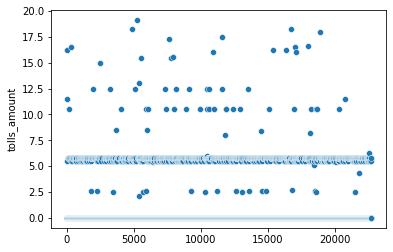

In [326]:
sns.scatterplot(x=data.index, y=data['tolls_amount'])

# 범주형 데이터 전처리

### debit, credit 모두 카드이며, 현금과 구분하기 위해 card는 서로 결합

In [327]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [328]:
data['payment_method'].nunique()

3

In [329]:
data['payment_method'].value_counts()

Cash           11094
Debit Card      5729
Credit Card     5672
Name: payment_method, dtype: int64

In [330]:
data['payment_method'].replace(['Debit Card', 'Credit Card'], 'Card', inplace=True)

# 승객명 성과 이름 분리

### 원래 영어 이름의 성은 뒷부분이나, 문제에서 firstname을 생성하라고 했으므로 앞부분 저장...

In [331]:
data['passenger_first_name'] = data['passenger_name'].map(lambda x: x.split()[0])

In [332]:
data['passenger_first_name']

0          Pamela
1        Michelle
2            Tina
3         Anthony
4         Brianna
           ...   
22696      Austin
22697     Monique
22698        Drew
22699    Jonathan
22700    Benjamin
Name: passenger_first_name, Length: 22495, dtype: object

# 택시 탑승, 하차 시간 활용

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22495 non-null  object 
 1   tpep_pickup_datetime   22495 non-null  object 
 2   tpep_dropoff_datetime  22495 non-null  object 
 3   payment_method         22495 non-null  object 
 4   passenger_count        22495 non-null  int64  
 5   trip_distance          22495 non-null  float64
 6   fare_amount            22495 non-null  float64
 7   tip_amount             22495 non-null  float64
 8   tolls_amount           22495 non-null  float64
 9   passenger_first_name   22495 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [334]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [335]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
 9   passenger_first_name   22495 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [337]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [338]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22495 non-null  object         
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns] 
 3   payment_method         22495 non-null  object         
 4   passenger_count        22495 non-null  int64          
 5   trip_distance          22495 non-null  float64        
 6   fare_amount            22495 non-null  float64        
 7   tip_amount             22495 non-null  float64        
 8   tolls_amount           22495 non-null  float64        
 9   passenger_first_name   22495 non-null  object         
 10  travel_time            22495 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [340]:
data['travel_time'] = data['travel_time'].map(lambda x: x.seconds)

In [341]:
data['travel_time']

0         844
1        1590
2         432
3        1815
4        1003
         ... 
22696     196
22697    2448
22698     248
22699     716
22700     800
Name: travel_time, Length: 22495, dtype: int64

# 보너스

In [342]:
data['total_amount'] = data['fare_amount'] + data['tip_amount']

### 튀는 값이 있으나 대체로 양의 상관관계를 보임

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

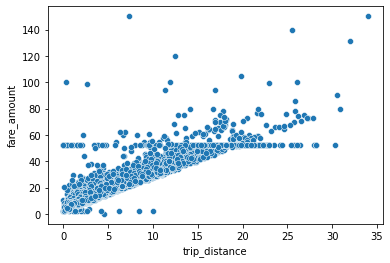

In [343]:
sns.scatterplot(x=data['trip_distance'], y=data['fare_amount'])

### travel_time에 비해 fare_amount가 적은 특이사항 식별

<AxesSubplot:xlabel='travel_time', ylabel='fare_amount'>

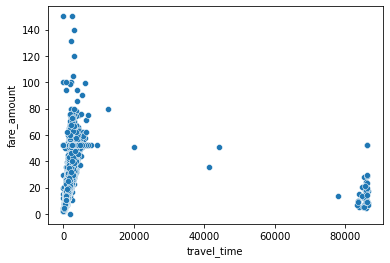

In [344]:
sns.scatterplot(x=data['travel_time'], y=data['fare_amount'])

### 위와 동일하게 travel_time에 비해 trip_distance가 짧은 특이사항 식별

<AxesSubplot:xlabel='travel_time', ylabel='trip_distance'>

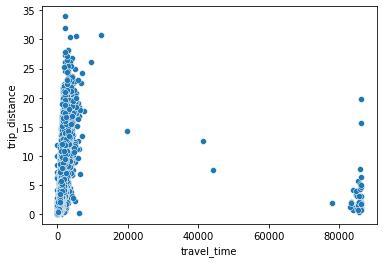

In [345]:
sns.scatterplot(x=data['travel_time'], y=data['trip_distance'])

### travel_time이 60000 이상인 경우, 높은 travel_time에 비해 trip_distance와 fare_amount가 낮으며, 19000이상인 경우도 근처에 비슷한 간격의 다른 값이 없으며 비슷한 값도 없으므로 이상치로 판단 후 제거

In [346]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_time,total_amount
count,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000,22495.000000
mean,1.646055,2.929325,12.916231,1.815606,0.308365,1027.334519,14.731836
std,1.285713,3.643941,10.731921,2.367239,1.380942,3736.927933,12.287204
min,1.000000,0.010000,0.010000,0.000000,0.000000,1.000000,0.010000
25%,1.000000,1.000000,6.500000,0.000000,0.000000,404.000000,7.500000
50%,1.000000,1.630000,9.500000,1.360000,0.000000,674.000000,10.950000
75%,2.000000,3.090000,14.500000,2.450000,0.000000,1107.000000,16.500000
max,6.000000,33.960000,150.000000,28.000000,19.100000,86373.000000,150.000000


In [347]:
data['travel_time'].sort_values().tail(60)

2690      5886
12894     5904
11610     6060
2476      6084
2515      6100
1254      6120
175       6323
18539     6554
16407     6571
1929      6694
3543      7010
11544     7132
820       7759
19485     9559
30       12550
5053     19927
13221    41393
11887    44163
8197     77933
7171     83208
17396    83504
13149    83523
4602     83693
1357     83964
5480     83999
11674    84784
14411    84880
8714     85118
1760     85221
12564    85255
9358     85381
9210     85389
14324    85445
19166    85451
1201     85491
21650    85724
22280    85759
1012     85802
699      85850
13798    85851
5372     85864
20689    85876
18425    85924
18545    85975
10212    86039
10931    86107
8871     86148
21513    86187
21420    86190
7014     86200
18652    86218
6495     86270
6753     86282
21368    86296
7941     86308
15165    86313
22640    86319
15000    86331
15581    86349
926      86373
Name: travel_time, dtype: int64

In [349]:
data = data.loc[data['travel_time']<19000]

In [350]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448,66.64
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716,12.20
